In [ ]:
import shuffle_all_cxs.interactive_cx_list_optimizer
import cx_list_from_stabilizers_in_sequence
import draw_ordered_tanner_graph
from circuit_from_cx_list import memory_experiment_circuit_from_cx_list

ModuleNotFoundError: No module named 'interactive_cx_list_optimizer'

In [ ]:

random_ordered_code = cx_list_from_stabilizers_in_sequence.RotatedSurfaceCode(L=5)

optimizer_settings = {
    "code" : random_ordered_code,
    "cycles_with_noise": 5,
    "p_cx": 0.01,
    "p_idle": 0,
    "experiment_type": "both",
}

run_optimazation_settings = {
    "max_bp_iterations": 5,
    "osd_order": 5,
    "iterations": 50,
    "max_num_shots": 10_000,
    "max_num_errors": 1_000,

}

In [3]:
#code = cx_list_from_stabilizers_in_sequence.RotatedSurfaceCode(L=3)

flag_optimizer = interactive_cx_list_optimizer.InteractiveCxListOptimizer(
    **optimizer_settings
)


In [4]:
flag_optimizer.run_optimization(**run_optimazation_settings,
                            flags=True,
                            step_type='single_stabilizer')

flag: X0
flag: X1
flag: X2
flag: X3
flag: Z0
flag: Z1
flag: Z2
flag: Z3
n_times_flagged: [86, 186, 0, 0, 64, 215, 0, 0]
flag: X0
flag: X1
flag: X2
flag: X3
flag: Z0
flag: Z1
flag: Z2
flag: Z3
n_times_flagged: [325, 111, 0, 0, 318, 75, 0, 0]
iteration 0
Changed: (3, 'X0') -> (0, 'X0')
Changed: (0, 'X0') -> (1, 'X0')
Changed: (1, 'X0') -> (3, 'X0')
flag: X0
flag: X1
flag: X2
flag: X3
flag: Z0
flag: Z1
flag: Z2
flag: Z3
n_times_flagged: [47, 196, 0, 0, 55, 195, 0, 0]
flag: X0
flag: X1
flag: X2
flag: X3
flag: Z0
flag: Z1
flag: Z2
flag: Z3
n_times_flagged: [40, 72, 0, 0, 114, 107, 0, 0]
Iteration 0: improved objective to 0.06662064371461918
iteration 1
Changed: (7, 'X1') -> (8, 'X1')
Changed: (5, 'X1') -> (7, 'X1')
Changed: (8, 'X1') -> (5, 'X1')
flag: X0
flag: X1
flag: X2
flag: X3
flag: Z0
flag: Z1
flag: Z2
flag: Z3
n_times_flagged: [49, 141, 0, 0, 47, 176, 0, 0]
flag: X0
flag: X1
flag: X2
flag: X3
flag: Z0
flag: Z1
flag: Z2
flag: Z3
n_times_flagged: [46, 298, 0, 0, 145, 80, 0, 0]
iteratio

In [5]:

random_optimizer = interactive_cx_list_optimizer.InteractiveCxListOptimizer(
    **optimizer_settings,
)

In [6]:
random_optimizer.run_optimization(**run_optimazation_settings,
                            flags=False,
                            step_type='single_stabilizer')

iteration 0
Changed: (3, 'X2') -> (6, 'X2')
Changed: (6, 'X2') -> (3, 'X2')
Iteration 0: improved objective to 0.14804903999999997
iteration 1
Changed: (6, 'X2') -> (3, 'X2')
Changed: (3, 'X2') -> (6, 'X2')
Iteration 1: improved objective to 0.14237233701103302
iteration 2
Changed: (4, 'X0') -> (1, 'X0')
Changed: (3, 'X0') -> (0, 'X0')
Changed: (0, 'X0') -> (4, 'X0')
Changed: (1, 'X0') -> (3, 'X0')
iteration 3
Changed: (7, 'Z3') -> (8, 'Z3')
Changed: (8, 'Z3') -> (7, 'Z3')
iteration 4
Changed: (2, 'X3') -> (5, 'X3')
Changed: (5, 'X3') -> (2, 'X3')
iteration 5
Changed: (7, 'X1') -> (8, 'X1')
Changed: (5, 'X1') -> (7, 'X1')
Changed: (8, 'X1') -> (5, 'X1')
iteration 6
Changed: (7, 'X1') -> (8, 'X1')
Changed: (5, 'X1') -> (4, 'X1')
Changed: (4, 'X1') -> (5, 'X1')
Changed: (8, 'X1') -> (7, 'X1')
iteration 7
Changed: (4, 'X0') -> (1, 'X0')
Changed: (3, 'X0') -> (0, 'X0')
Changed: (0, 'X0') -> (3, 'X0')
Changed: (1, 'X0') -> (4, 'X0')
iteration 8
Changed: (1, 'Z0') -> (4, 'Z0')
Changed: (5, '

In [7]:
code = cx_list_from_stabilizers_in_sequence.RotatedSurfaceCode(L=5, ordering='optimal')

optimizer_settings['code'] = code
optimizer_starting_at_optimal = interactive_cx_list_optimizer.InteractiveCxListOptimizer(
    **optimizer_settings
)


optimization_settings_zero_iterations = run_optimazation_settings.copy()
optimization_settings_zero_iterations['iterations'] = 0
optimizer_starting_at_optimal.run_optimization(**optimization_settings_zero_iterations,
                                                flags=False,
                                                draw=False,
                                                step_type='single_stabilizer',
                                                )
optimal_logical_error_rate = optimizer_starting_at_optimal.optimizer_history[-1]

In [8]:
print(optimal_logical_error_rate.objective_value)

0.05307739000000011


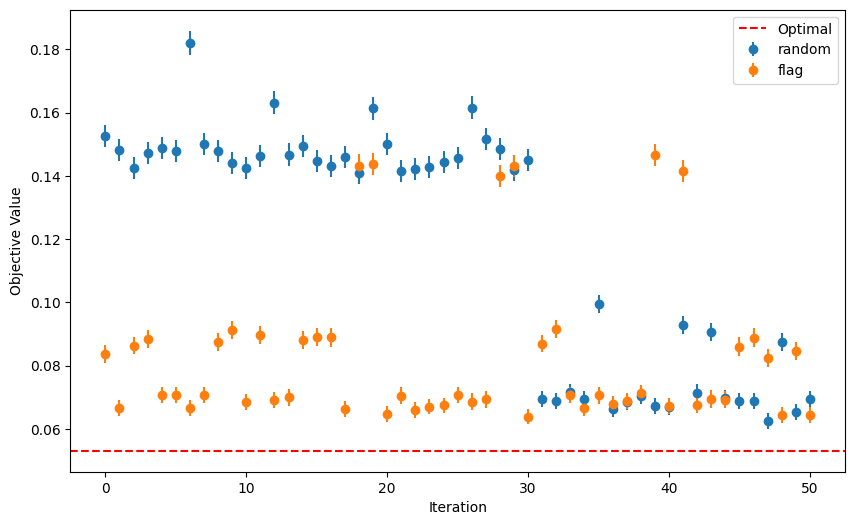

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
random_optimizer.plot_history(ax, label='random')
flag_optimizer.plot_history(ax, label='flag')
ax.axhline(y=optimizer_starting_at_optimal.optimizer_history[-1].objective_value, color='r', linestyle='--', label='Optimal')
ax.legend()#['optimal', 'random', 'flag'])

In [10]:
print(flag_optimizer.optimizer_history[-1].cx_list)
print(flag_optimizer.optimizer_history[0].cx_list)

[(4, 'X0'), (0, 'X0'), (1, 'X0'), (3, 'X0'), (7, 'X1'), (5, 'X1'), (4, 'X1'), (8, 'X1'), (3, 'X2'), (6, 'X2'), (2, 'X3'), (5, 'X3'), (2, 'Z0'), (1, 'Z0'), (5, 'Z0'), (4, 'Z0'), (7, 'Z1'), (6, 'Z1'), (4, 'Z1'), (3, 'Z1'), (1, 'Z2'), (0, 'Z2'), (7, 'Z3'), (8, 'Z3')]
[(4, 'X0'), (3, 'X0'), (0, 'X0'), (1, 'X0'), (7, 'X1'), (5, 'X1'), (4, 'X1'), (8, 'X1'), (3, 'X2'), (6, 'X2'), (2, 'X3'), (5, 'X3'), (1, 'Z0'), (5, 'Z0'), (4, 'Z0'), (2, 'Z0'), (6, 'Z1'), (4, 'Z1'), (3, 'Z1'), (7, 'Z1'), (1, 'Z2'), (0, 'Z2'), (7, 'Z3'), (8, 'Z3')]


In [11]:
#draw_ordered_tanner_graph.draw_cx_list(flag_optimizer.optimizer_history[0].cx_list, flag_optimizer.ancilla_type, data_coords=code.data_coords, ancilla_coords=code.ancilla_coords)
cx_list1 = random_ordered_code.generate_cx_list()
cx_list2 = random_optimizer.optimizer_history[0].cx_list

for i, (a, b) in enumerate(zip(cx_list1, cx_list2)):
    if a != b:
        print(f"Difference at index {i}: {a} != {b}")

assert cx_list1 == cx_list2

In [12]:
print(random_ordered_code.generate_cx_list())
print(random_optimizer.optimizer_history[0].cx_list)

[(4, 'X0'), (3, 'X0'), (0, 'X0'), (1, 'X0'), (7, 'X1'), (5, 'X1'), (4, 'X1'), (8, 'X1'), (3, 'X2'), (6, 'X2'), (2, 'X3'), (5, 'X3'), (1, 'Z0'), (5, 'Z0'), (4, 'Z0'), (2, 'Z0'), (6, 'Z1'), (4, 'Z1'), (3, 'Z1'), (7, 'Z1'), (1, 'Z2'), (0, 'Z2'), (7, 'Z3'), (8, 'Z3')]
[(4, 'X0'), (3, 'X0'), (0, 'X0'), (1, 'X0'), (7, 'X1'), (5, 'X1'), (4, 'X1'), (8, 'X1'), (3, 'X2'), (6, 'X2'), (2, 'X3'), (5, 'X3'), (1, 'Z0'), (5, 'Z0'), (4, 'Z0'), (2, 'Z0'), (6, 'Z1'), (4, 'Z1'), (3, 'Z1'), (7, 'Z1'), (1, 'Z2'), (0, 'Z2'), (7, 'Z3'), (8, 'Z3')]
